In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
with open("data/NE_3-11.pk", 'rb') as file:
    NE_data = pickle.load(file)

print(NE_data)

{3: [0.28718707889821465, 0.4641016151377231, 0.2679491924341272, 0.26794919242814974], 4: [0.1684375244852117, 0.4477365732247908, 0.4248727049531577, 0.12565488835943256, 0.001735833462618963], 5: [0.16967733261636536, 0.3581907722466692, 0.31558698265034996, 0.19182306474683442, 0.09677178087885936, 0.037627399477286994], 6: [0.13850629520939903, 0.3265677622770902, 0.297470322260759, 0.23135992484029755, 0.12249487676051264, 0.021644028588676114, 0.0004630852726644763], 7: [0.12322710099769263, 0.29457468849635626, 0.2704791356644377, 0.22475052400170645, 0.1407314817155909, 0.05808757884824096, 0.010979491995179528, 0.0003970992784880778], 8: [0.10942605270273328, 0.2709932771746697, 0.25119786302012764, 0.21761966098545643, 0.15707594412837064, 0.08223273337914656, 0.01987765149136944, 0.0010004480271498001, 2.4217937096837616e-06], 9: [0.09854926954752968, 0.25147436858251737, 0.23479666276384537, 0.20859448124183516, 0.16413662889968775, 0.10004607595292778, 0.03626343304283435

In [3]:
ns, c0s = zip(*[(k, NE_data[k][0]) for k in NE_data.keys()])

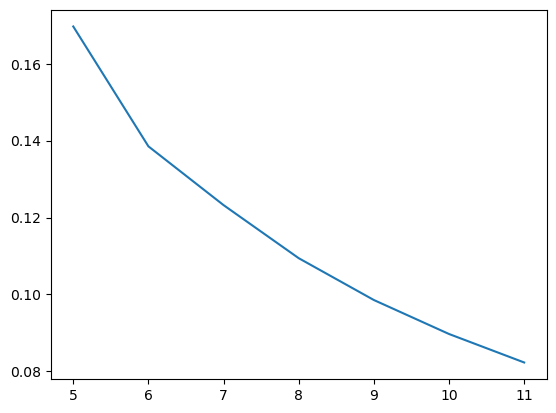

In [4]:
plt.plot(ns[2:], c0s[2:])

[ 0.06672678  0.29865376 -0.79503788]
[0.02873856 0.96229095 1.1979993 ]


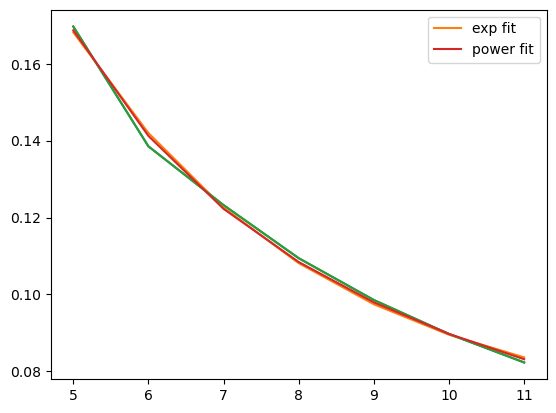

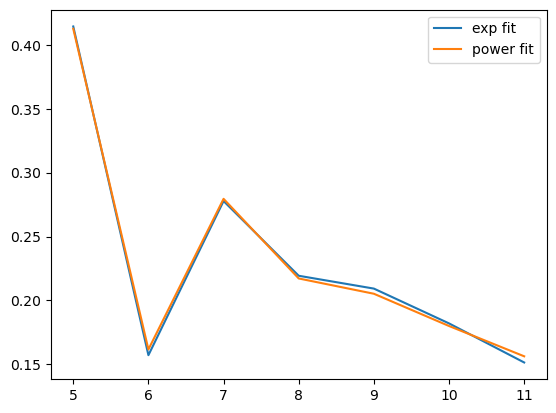

In [7]:
def f1(x, a, b, c):
    return a + np.exp(-b*x + c)

def f2(x, a, b, c):
    return a + b*np.power(x, -c)

popt, pcov = curve_fit(f1, ns[2:], c0s[2:])

fit1 = [f1(x, *popt) for x in ns[2:]]
print(popt)
plt.plot(ns[2:], c0s[2:])
plt.plot(ns[2:], fit1, label="exp fit")


popt, pcov = curve_fit(f2, ns[2:], c0s[2:])
fit2 = [f2(x, *popt) for x in ns[2:]]
print(popt)
plt.plot(ns[2:], c0s[2:])
plt.plot(ns[2:], fit2, label="power fit")
plt.legend()
plt.show()

resids1 = [(c - f) / c for f,c in zip(fit1, c0s)]
plt.plot(ns[2:], resids1, label="exp fit")

resids2 = [(c - f) / c for f,c in zip(fit2, c0s)]
plt.plot(ns[2:], resids2, label="power fit")
plt.legend()
plt.show()